In [25]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Imports

In [26]:
from graphviz import Digraph
from graphviz import Source
from IPython.display import Image,display,clear_output
import csv
import time

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Movie class

In [28]:
class Movie:
  def __init__(self,title,WE,DE,DPE,FE,FPE,year):
    #Title
    self.title=title
    #Worldwide Earnings
    self.WE=WE
    #Domestic Earnings
    self.DE=DE
    #Domestic Percent Earnings
    self.DPE=DPE
    #Foreign Earnings
    self.FE=FE
    #Foreign Percent Earnings
    self.FPE=FPE
    #Year
    self.year=year


Family Class

In [29]:
class Family:
  def __init__(self):
    #Representacion de la familia de un nodo en el arbol
    self.parent=None
    self.unc=None
    self.grandpa=None

Tree Classes

In [30]:
class Tree:
    def __init__(self):
        self.root = None

    def insert(self,data):
      if(self.root is None):
        #Si no hay raiz(No hay nodos en el arbol) entonces asignamos al nuevo nodo como raiz
        self.root=Node(data)
      else:
        #A la raiz se le asigna lo que devuelva la funcion por si la raiz del arbol cambia por alguna rotacion
        self.root=self.root.insert(data)

    def lookup(self,data):
      if(self.root is not None):
        #Dado un titulo, se busca un nodo
        return self.root.lookup(data)
      return None

    def delete(self, data):
      #Dado un titulo, se elimina el nodo
        if self.root is not None:
            self.root = self.root.delete(data)


    def find_movies(self, year, foreign_earnings_min):
        # Función que busca varios nodos en base a unos parametros(year,foreign_earnings_min)
        results = []
        if self.root is not None:
            self.root.find_movies(year, foreign_earnings_min, results)
        return results

    def to_dot(self):
      #Genera un dot del arbol
        dot = Digraph()
        if self.root is not None:
            self.root.to_dot(dot)
        return dot

    def showInfo(self,node):
      #Mostrar informacion de un nodo(balanceo,nivel,padre,abuelo,tio)
        self.root.showInfo(node)

    def recorridoNiveles(self):
      #Empezar el recorrido por niveles de manera recursiva
      q=[]
      if self.root is not None:
        q= self.root.recorridoNiveles(q)
      return q

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.balance= 0


    def insert (self, data):
      if(data.title==self.data.title):
        #Si ya existe la informacion en el arbol entonces se termina el llamado recursivo y se devuelve el nodo original
        print("Esta pelicula ya existe en el arbol")
        return self

      #Recorrido izquierdo
      if(data.title<self.data.title):
        if(self.left is None):
          #Cuando se encuentra en donde agregar el nuevo nodo
          self.left = Node(data)

        else:
          #Se continua el recorrido y se le asigna lo que sea que retorne la funcion al terminar la recursividad
          self.left=self.left.insert(data)

      #Recorrido derecho
      if(data.title>self.data.title):
        if(self.right is None):
          #Cuando se encuentra en donde agregar el nuevo nodo
          self.right=Node(data)

        else:
          #Se continua el recorrido y se le asigna lo que sea que retorne la funcion al terminar la recursividad
          self.right=self.right.insert(data)
      #encontrar los factores de balanceo de los nodos recorridos
      self.find_balance()
      #Logica de rotaciones, si es necesaria se devuelve la nueva raiz del subarbol
      if(self.right):
        if (self.balance==2 and self.right.balance == 1):
          return self.left_rotation()
        elif (self.balance==2 and self.right.balance == -1):
          return self.double_right_left_rotation()

      if self.left:
        if (self.balance== -2 and self.left.balance== -1):
          return self.right_rotation()
        elif(self.balance==-2 and self.left.balance==1):
         return self.double_left_right_rotation()
      #Si no se requieren rotaciones la raiz del subarbol permanece igual
      return self


    def lookup(self,data):
      #Si se encontro la informacion, devuelve el nodo
      if (data==self.data.title):
        return self
      #Si el dato a buscar es menor que el actual, se continua el recorrido por la izquierda
      if(data<self.data.title and self.left is not None):
        return self.left.lookup(data)
      #Si el dato a buscares mayor que el actual, se continua el recorrido por la derecha
      if(data>self.data.title and self.right is not None):
        return self.right.lookup(data)
      #Si no se encontro la informacion, entonces retorna None
      return None

    def find_height(self):
      izq=0
      der=0
      #Si existe un subarbol izquierdo se continua la recursivad en ese nodo
      if (self.left is not None):
        #Suma de los recorridos izquierdos
        izq=self.left.find_height()
      #Si existe un subarbol derecho se continua la recursivad en ese nodo
      if(self.right is not None):
        #Suma de los recorridos derechos
        der=self.right.find_height()
      #Devuelve el subarbol de mayor altura y se le suma un 1 a esa altura
      return max(izq,der)+1

    def find_balance(self):
      if (self.right is not None):
        #Si existe un subarbol derecho entonces se encuentra su la altura
        right=self.right.find_height()
      else:
        #Si no existe un subarbol derecho entonces la altura derecha es 0
        right=0

      if (self.left is not None):
        #Si existe un subarbol izquierdo entonces se encuentra su la altura
        left=self.left.find_height()
      else:
        #Si no existe un subarbol izquierdo entonces la altura izquierda es 0
        left=0
      #Con las dos alturas obtenidas se calcula el factor de balanceo
      self.balance=right-left

    def delete(self, data):
      if data < self.data.title:
          if self.left is not None:
              self.left = self.left.delete(data)
      elif data > self.data.title:
          if self.right is not None:
              self.right = self.right.delete(data)
      else:
          # Caso 1: El nodo a eliminar es una hoja
          if self.left is None and self.right is None:
              return None
          # Caso 2: El nodo a eliminar tiene un solo hijo
          if self.left is None:
              return self.right
          if self.right is None:
              return self.left
          # Caso 3: El nodo a eliminar tiene dos hijos (usando el predecesor in-order)
          max_smaller_node = self.left.get_max()  # Busca el predecesor in-order
          self.data = max_smaller_node.data
          self.left = self.left.delete(max_smaller_node.data.title)

      self.find_balance()
      return self.rebalance()

    def get_max(self):
      #Buscando el mayor del subarbol izquierdo (self)
      if self.right is None:
          return self
      else:
          return self.right.get_max()

    def rebalance(self):
      # Rotaciones para mantener el balance
      if self.balance > 1:
          if self.right and self.right.balance < 0:
              self.right = self.right.right_rotation()
          return self.left_rotation()
      if self.balance < -1:
          if self.left and self.left.balance > 0:
              self.left = self.left.left_rotation()
          return self.right_rotation()
      return self

    #Todos los tipos de rotaciones
    def double_left_right_rotation(self):
      if self.left:
        self.left=self.left.left_rotation()
      return self.right_rotation()

    def double_right_left_rotation(self):
      if self.right:
        self.right=self.right.right_rotation()
      return self.left_rotation()

    def right_rotation(self):
      aux=self.left
      self.left=aux.right
      aux.right=self
      self.find_balance()
      aux.find_balance()
      return aux

    def left_rotation(self):
      aux=self.right
      self.right=aux.left
      aux.left=self
      self.find_balance()
      aux.find_balance()
      return aux

    def findLevel(self,node,level=0):
      if self.data.title==node.data.title:
        #Se encontro el nodo entonces se devuelve la suma de los niveles hasta este punto
        return level
      #Se continua el recorrido con respecto a la metrica y si existe un subarbol para donde ir
      if self.left and node.data.title<self.data.title:
        #Se devuelve el recorrido izquierdo, se le suma un 1 al nivel para indicar que esta avanzando mas abajo en el arbol
        return self.left.findLevel(node,level+1)
      #Se continua el recorrido con respecto a la metrica y si existe un subarbol para donde ir
      if self.right and node.data.title>self.data.title:
        #Se devuelve el recorrido izquierdo, se le suma un 1 al nivel para indicar que esta avanzando mas abajo en el arbol
        return self.right.findLevel(node,level+1)
      #El nodo no se encontro
      return -1

    def recorridoNiveles(self,q,lvl=0):
      #Si la longitud del vector q es menor o igual que el actual
      if len(q)<=lvl:
        #Se le agrega una nueva lista para poder almacenar los nodos del nuevo nivel
        q.append([])
      #Se agrega el nodo actual a la lista del nivel actual
      q[lvl].append(self.data.title)

      if(self.left is not None):
        #Se continua al nodo izquierdo, y se le suma 1 al lvl para indicar que se aumento de nivel
        self.left.recorridoNiveles(q,lvl+1)
      if(self.right is not None):
        #Se continua al nodo derecho, y se le suma 1 al lvl para indicar que se aumento de nivel
        self.right.recorridoNiveles(q,lvl+1)
      #No se puede recorrer mas el arbol y se devuelven los niveles y nodos hasta este punto
      return q

    def showInfo(self,node):
      #Mostrar el nivel de un nodo, se llama a la funcion y devuelve un entero
      print("El nivel del nodo es: "+str(self.findLevel(node)))
      #Mostrar el factor de balanceo, se obtiene del atributo del mismo nodo
      print("El factor de balanceo del nodo es:"+str(node.balance))
      #Se buscan los familiares del nodo
      fam=self.findFam(node)

      if fam.parent:
        #Si tiene padre se muestra
        print("El padre del nodo es: "+fam.parent.data.title)
        if fam.grandpa:
          #Si tiene abuelo tambien se muestra
          print("El abuelo del nodo es: "+fam.grandpa.data.title)
          if fam.unc:
            #Si tiene tio tambien se muestra
            print("El tio del nodo es: "+fam.unc.data.title)
          else:
            #No tiene tio
            print("El nodo no tiene tio")
        else:
          #No tiene abuelo(No puede tener tio)
          print("El nodo no tiene ni abuelo ni tio")
      else:
        #No tiene padre(No puede tener abuelo ni tio)
        print("El nodo no tiene padre ni abuelo ni tio")

    def findFam(self,node,fam=Family()):
      if self.left:
        if self.left.left and self.left:
          #Si el nodo actual tiene un hijo izquierdo y un nieto que tiene la info que estamos buscando
          if(self.left.left.data.title==node.data.title):
            #El nodo actual seria el abuelo
            fam.grandpa=self
            #El hijo izquierdo seria el padre
            fam.parent=self.left
            if self.right:
              #En caso de que el abuelo tenga un hijo derecho, entonces ese seria el tio
              fam.unc=self.right
        if self.left and self.left.right:
          #Si el nodo actual tiene un hijo izquierdo y un nieto que tiene la info que estamos buscando
          if (self.left.right.data.title==node.data):
            #El nodo actual seria el abuelo
            fam.grandpa=self
            #El hijo izquierdo seria el padre
            fam.parent=self.left
            if self.right:
              #En caso de que el abuelo tenga un hijo derecho, entonces ese seria el tio
              fam.unc=self.right

        #No puede haber abuelo entonces se busca el padre
        if self.left.data.title==node.data.title:
          #Si tiene hijo izquierdo y es el nodo que estamos buscando entonces el nodo actual seria el padre
          fam.parent=self
        else:
          #Si tiene hijo izquierdo pero no es el que estamos buscando entonces se continua la busqueda desde el hijo izquierdo
          self.left.findFam(node,fam)

      if self.right:
        if self.right and self.right.right:
          #Si el nodo actual tiene un hijo derecho y un nieto que tiene la info que estamos buscando
          if(self.right.right.data.title==node.data.title):
            #El nodo actual seria el abuelo
            fam.grandpa=self
            #El hijo derecho seria el padre
            fam.parent=self.right
            if self.left:
              #En caso de que el abuelo tenga un hijo derecho, entonces ese seria el tio
              fam.unc=self.left

        if self.right and self.right.left:
          #Si el nodo actual tiene un hijo derecho y un nieto que tiene la info que estamos buscando
          if(self.right.left.data.title==node.data.title):
            #El nodo actual seria el abuelo
            fam.grandpa=self
            #El hijo derecho seria el padre
            fam.parent=self.right
            if self.left:
              #En caso de que el abuelo tenga un hijo derecho, entonces ese seria el tio
              fam.unc=self.left

        #No puedo haber abuelo entonces se busca el padre
        if self.right.data.title==node.data.title:
          #Si tiene hijo derecho y es el nodo que estamos buscando entonces el nodo actual seria el padre
          fam.parent=self
        else:
          #Si tiene hijo derecho pero no es el que estamos buscando entonces se continua la busqueda desde el hijo izquierdo
          self.right.findFam(node,fam)

      #No se puede recorrer mas el arbol entonces se devuelva la familia que se encontro
      return fam


    def to_dot(self, dot, parent=None):
      #Generar dot del arbol
      if parent is not None:
        dot.edge(sanitize_label(parent.data.title), sanitize_label(self.data.title))
      if self.left:
        self.left.to_dot(dot, self)
      if self.right:
        self.right.to_dot(dot, self)



    def find_movies(self, year, foreign_earnings_min, results):
        # Verificamos el nodo actual si cumple con los criterios
        if self.data.year == year and \
           self.data.DPE < self.data.FPE and \
           self.data.FE >= foreign_earnings_min:
            results.append(self.data)
      # Recursivamente buscamos en el subárbol izquierdo y derecho
        if self.left:
            self.left.find_movies(year, foreign_earnings_min, results)
        if self.right:
            self.right.find_movies(year, foreign_earnings_min, results)
        return results





def load_movies_from_csv(file_path, limit=None):
    movies = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        count = 0
        for row in reader:
            #Si el contador(cuantas veces a agregado una pelicula a la lista) entonces se termina el ciclo for
            if limit is  None or count >= limit:
                break
            #Obtener los valores de la fila y asignarlos a unas variables
            title = row["Title"]
            WE = int(row["Worldwide Earnings"])
            year = int(row['Year'])
            DE = int(row["Domestic Earnings"])
            DPE = float(row['Domestic Percent Earnings'])
            FPE = float(row['Foreign Percent Earnings'])
            FE = int(row['Foreign Earnings'])
            #Con las variables obtenidas crear un objeto Movie
            movie = Movie(title, WE, DE, DPE, FE, FPE, year)
            #Ese objeto movie agregarselo a la lista de peliculas
            movies.append(movie)
            #Despues de agregar una pelicula a la lista, incrementar el contador
            count += 1
    #Retornar lista de peliculas
    return movies

def sanitize_label(label):
    #Limpiar los titulos para evitar errores de sintaxis al utilizar graphviz
    if label is None:
        return '""'  # Si no hay "label" entonces se devuelve un string cualquiera vacio, para evitar errores

    #Eliminando simbolos posiblemente problematicos
    sanitized = label.replace('\\', '')
    sanitized = sanitized.replace('"', '')
    sanitized = sanitized.replace('\n', '')
    sanitized = sanitized.replace('~', '')
    sanitized = sanitized.replace('!', '')
    sanitized = sanitized.replace('?', '')
    sanitized = sanitized.replace('|', '')
    sanitized = sanitized.replace('<', '')
    sanitized = sanitized.replace('>', '')
    sanitized = sanitized.replace('/', '')
    sanitized = sanitized.replace('@', '')
    sanitized = sanitized.replace(':', '')
    sanitized = sanitized.replace('.', '')
    sanitized = sanitized.replace('-', '')

    # Diccionaria para reemplazar caracteres o eliminar caracteres problematicos
    caracteres = {
        'ç': 'c', 'é': 'e', 'ó': 'o', '³': '',
        '×': 'x', 'á': 'a', 'ä': 'a', '·': '',
        'ê': 'e', 'Æ': '', 'É': 'E', 'ö': 'o',
        'ñ': 'n', 'ò': 'o', 'í': 'i', 'û': 'u',
        'è': 'e', 'ü': 'u', 'ô': 'o', '¡': 'i',
        'å': 'a'
    }
    #Reemplazar o eliminar utilizando el diccionario
    for char, replacement in caracteres.items():
        sanitized = sanitized.replace(char, replacement)
    #Retornar el titulo con sintaxis adecuado para generar la imagen del arbol
    return f'"{sanitized}"'

def render_and_display(tree):
  #Se obtiene el dot del arbol
  dot=tree.to_dot()
  #Con el dot del arbol se crea la imagen
  dot.render('tree_after_insertion', format='png', cleanup=True)
  #Se muestra la imagen
  display(Image('tree_after_insertion.png'))


def read_int(txt, min=None, max=None):
  #Validacion de input, se obtiene el input, el limite inferior(si lo hay) y el limite superior(si lo hay)
    while True:
        try:
            value = int(input(txt))
            while((min is not None and value < min) or (max is not None and value > max)):
                value=int(input("Ingrese un valor entre "+str(min)+" y "+str(max)))

            return value
        except ValueError:
          #No se ingreso un int
            print("Ingrese un numero")







Main

Mostrando recorrido por niveles:
Nivel 0: Mission: Impossible II,
Nivel 1: Dinosaur, The Emperor's New Groove,
Nivel 2: Big Momma's House, How the Grinch Stole Christmas, Scream 3, The Perfect Storm,
Nivel 3: Anatomy, Chicken Run, Gladiator, Keeping the Faith, Pokémon the Movie 2000, Supernova, The House of Mirth, Traffic,
Nivel 4: About a Boy, Autumn in New York, Brotherhood of the Wolf, Dancer in the Dark, Fantasia 2000, Hanging Up, Italian for Beginners, Lost Souls, O Brother Where Art Thou?, Remember the Titans, Space Cowboys, The Cell, The Girl on the Bridge, The Legend of Bagger Vance, The Tigger Movie, What Lies Beneath,
Nivel 5: A Beautiful Mind, Almost Famous, Après Vous, Battlefield Earth, Boiler Room, Cast Away, Coyote Ugly, Der Wixxer, East Is East, Frequency, Gossip, Here on Earth, In the Mood for Love, Joe Somebody, Left Luggage, Master and Commander: The Far Side of the World, Napoleon Dynamite, Palais royal!, Punch0Drunk Love, Rugrats in Paris, Sinbad: Legend of the Sev

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.073084 to fit


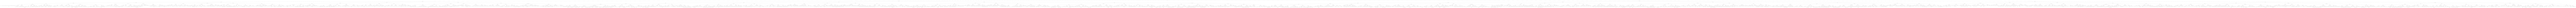

-----------------------------------------------------------------
--------------------------Bienvenid@-------------------------------
1.Generar Arbol con csv
2.Insertar Pelicula Nueva
3.Eliminar Nodo
4.Buscar informacion de nodos
5.Mostrar Recorrido por niveles
6.Vaciar Arbol
0.SALIR
-----------------------------------------------------------------
Digite una opcion: 0


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.073084 to fit


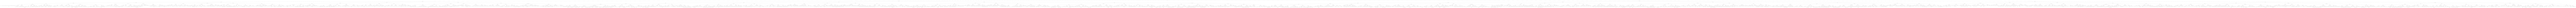

-----------------------------------------------------------------


In [34]:
opt=1#Entrar en el ciclo del meno
tree=Tree()
while(opt != 0):
  print("--------------------------Bienvenid@-------------------------------")
  print("1.Generar Arbol con csv")
  print("2.Insertar Pelicula Nueva")
  print("3.Eliminar Nodo")
  print("4.Buscar informacion de nodos")
  print("5.Mostrar Recorrido por niveles")
  print("6.Vaciar Arbol")
  print("0.SALIR")
  print("-----------------------------------------------------------------")
  time.sleep(5)#Sin esto no salia la caja de input despues de mostrar la imagen del arbol
  if(opt!=0):#Sin esto no salia la caja de input despues de mostrar la imagen del arbol
    #Leer la opcion ingresada
    opt = read_int("Digite una opcion: ",0,6)
  if(opt == 1):
    #Opicon 1
    clear_output(wait=True)
    num=read_int("Cuantas filas se deberian leer(Numero total de filas:4953)? ",1,4953)#Limite de filas a leer
    movies = load_movies_from_csv("/content/drive/MyDrive/dataset_movies.csv",num)#Lectura de las primeras num entradas
    for movie in movies:
      tree.insert(movie)#Insertar todas las peliculas leidas del archivo
    print("Arbol generado!")
    #Reestablecer opcion
    opt=1
  if(opt == 2):
    clear_output(wait=True)
    #Obtener input del usuario acerca de la pelicula a ingresar
    titulo=input("Digite el titulo de la pelicula")
    ingresos_mundiales=read_int("Digite los ingresos mundiales",0)
    ingresos_dom=read_int("Digite los ingresos domesticos",0)
    por_ingresos_dom=read_int("Digite el porcentaje de ingresos que fueron domesticos",0,100)
    ingresos_extranjeros=read_int("Digite los ingresos extranjero ",0)
    por_ingresos_ext=read_int("Digite el porcentaje de ingresos que fueron del extranjero",0,100)
    fecha=read_int("Digite el año en el que salio la pelicula",1895,2024)
    #Con la informacion ingresada insertar la pelicula nueva
    tree.insert(Movie(titulo,ingresos_mundiales,ingresos_dom,por_ingresos_dom,ingresos_extranjeros,por_ingresos_ext,fecha))
  if(opt == 3):
    clear_output(wait=True)
    #Obtener nombre de pelicula a eliminar
    name=input("Digite el nombre de la pelicula que desea eliminar")
    #Buscar si existe esa pelicula en el arbol
    node=tree.lookup(name)

    if(node is not None):
      tree.delete(node.data.title)#Existe, se elimina
      print("Nodo eliminado")
    else:
      print("La pelicula no existe en el arbol")#No existe, no se puede eliminar

  if(opt == 4):
    print("1. Un nodo en especifico")
    print("2. Busqueda especial de nodos")
    #Leer el tipo de busqueda deseado
    opt=read_int("Digite una opcion",1,2)
    if opt == 1:
      name=input("Digite el nombre de la pelicula")#Leer titulo de la pelicula que se buscara
      node=tree.lookup(name)#Buscar
      if node is not None:
        tree.showInfo(node)#Se encontro, llamar metodo showInfo y mostrar la informacion de ese nodo
      else :
        print("El nodo no existe")#No se encontro, no se puede mostrar informacion
    else:#Busqueda especial
    #Obtener parametros para la busqueda
      fecha=read_int("Ingrese una fecha de estreno",1895,2024)
      min_ingresos_ext=read_int("Ingrese un minimo de ingresos extranjeros",1)
      #Encontrar las peliculas que cumplan con los parametros
      results=tree.find_movies(fecha, min_ingresos_ext)
      cont=0
      if len(results)>0:
        for movie in results:#Mostrar todas las peliculas encontradas
          cont+=1
          print(str(cont)+". "+movie.title)
        opt=read_int("De cual nodo deseas obtener mas informacion?",1,len(results))#Obtener el numero del nodo del cual se quiere mas informacion
        node=tree.lookup(results[opt-1].title)#Buscarlo en el arbol
        tree.showInfo(node)#Mostrar su informacion
      else:
        print("No se encotraron nodos que cumplan con esos parametros")
    #Reestablecer opcion
    opt= 4
  if (opt == 5):
    clear_output(wait=True)
    recorrido=tree.recorridoNiveles()#Obtener recorrido por niveles
    if not recorrido:
      print("El árbol no tiene nodos")#Si la lista esta vacia entonces no hay nodos en el arbol
    else:
      print("Mostrando recorrido por niveles:")
      for nivel in recorrido:#Si hay nodos en el arbol, se muestran los nodos en cada nivel
        index = recorrido.index(nivel)#Nivel actual
        nivel_str = ""
        for titulo in nivel:#Nodos del nivel actual
            nivel_str += titulo + ", "
        print(f"Nivel {index}: {nivel_str.strip()}")#Mostrar el nivel actual y sus nodos
  if (opt == 6):
    clear_output(wait=True)
    tree=Tree()#A "tree" se le asigna un nuevo arbol que esta vacio

  render_and_display(tree)#Obtener y mostrar representacion grafica del arbol
  print("-----------------------------------------------------------------")



PRUEBA


In [ ]:
"""
tree = Tree()

# Cargar las películas desde el CSV
#movies = load_movies_from_csv("dataset_movies.csv")   # Ruta al archivo CSV

#movies = load_movies_from_csv("/content/drive/MyDrive/dataset_movies.csv")#lectura de todo el archivo

movies = load_movies_from_csv("/content/drive/MyDrive/dataset_movies.csv",30)#Lectura de las primeras x,entradas

# Insertar las películas en el árbol
for movie in movies:
    tree.insert(movie)

# Búsqueda de películas que cumplan con los criterios
year = 2015
foreign_earnings_min = 10000000
results = tree.find_movies(year, foreign_earnings_min)

# Mostrar los títulos de las películas que cumplen con los criterios
print("Películas que cumplen con los criterios:")
for movie in results:
    print(movie.title)

# Generar la representación gráfica del árbol

dot = tree.to_dot()
dot.render('tree_after_insertion', format='png',engine='neato', cleanup=True)

Image('tree_after_insertion.png')

"""

TEST

In [ ]:
"""# Example usage in Google Colab

# Create a new Tree
tree = Tree()

# Insert nodes
data = [128,9,76,142,37,85,58,133,46,25,113,99,2,14,123,67,41,151,62,84,136,108,29,44,92]
for value in data:
    tree.insert(value)

tree.delete(84)
# Generate DOT representation and render it
dot = tree.to_dot()
dot.render('tree', format='png', cleanup=True)



# Display the tree
Image('tree.png')
"""

